# Data Imports + Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load in eeg data
eeg = pd.read_csv("cleaned_data/meanfeatures.csv")

# quick peek at data
eeg.head()

# drop unnamed 0
eeg.drop("Unnamed: 0", axis=1, inplace=True)

In [3]:
eeg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SubjectID          100 non-null    float64
 1   VideoID            100 non-null    float64
 2   user-definedlabel  100 non-null    float64
 3   Attention          100 non-null    float64
 4   Mediation          100 non-null    float64
 5   Raw                100 non-null    float64
 6   Delta              100 non-null    float64
 7   Theta              100 non-null    float64
 8   Alpha1             100 non-null    float64
 9   Alpha2             100 non-null    float64
 10  Beta1              100 non-null    float64
 11  Beta2              100 non-null    float64
 12  Gamma1             100 non-null    float64
 13  Gamma2             100 non-null    float64
dtypes: float64(14)
memory usage: 11.1 KB


Looks like the data is coming to us in a pretty clean state. We see no missing values and each column is already in float64 format.

In [4]:
# check for class imbalance
eeg["user-definedlabel"].value_counts()

user-definedlabel
1.0    51
0.0    49
Name: count, dtype: int64

No class imbalance to worry about

# Histogram of Features

array([[<Axes: title={'center': 'SubjectID'}>,
        <Axes: title={'center': 'VideoID'}>,
        <Axes: title={'center': 'user-definedlabel'}>,
        <Axes: title={'center': 'Attention'}>],
       [<Axes: title={'center': 'Mediation'}>,
        <Axes: title={'center': 'Raw'}>,
        <Axes: title={'center': 'Delta'}>,
        <Axes: title={'center': 'Theta'}>],
       [<Axes: title={'center': 'Alpha1'}>,
        <Axes: title={'center': 'Alpha2'}>,
        <Axes: title={'center': 'Beta1'}>,
        <Axes: title={'center': 'Beta2'}>],
       [<Axes: title={'center': 'Gamma1'}>,
        <Axes: title={'center': 'Gamma2'}>, <Axes: >, <Axes: >]],
      dtype=object)

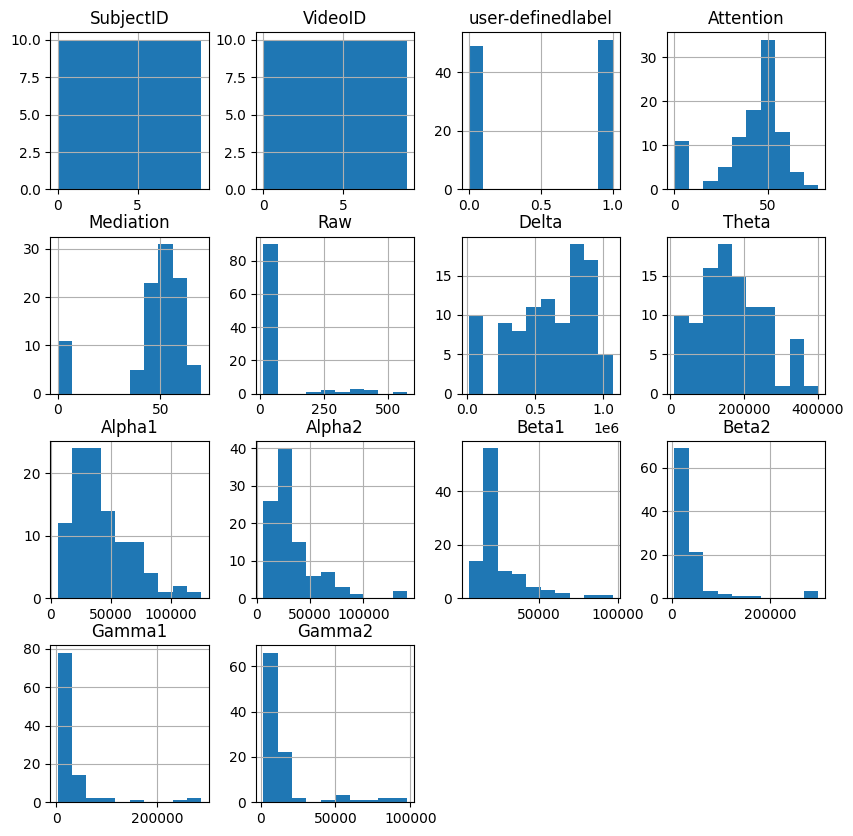

In [5]:
# plot each variables histogram
eeg.hist(figsize=(10, 10))

A few of our features are heavily skewed. Later on, we can use **log scaling** to transform these features.

# Boxplot

<Axes: >

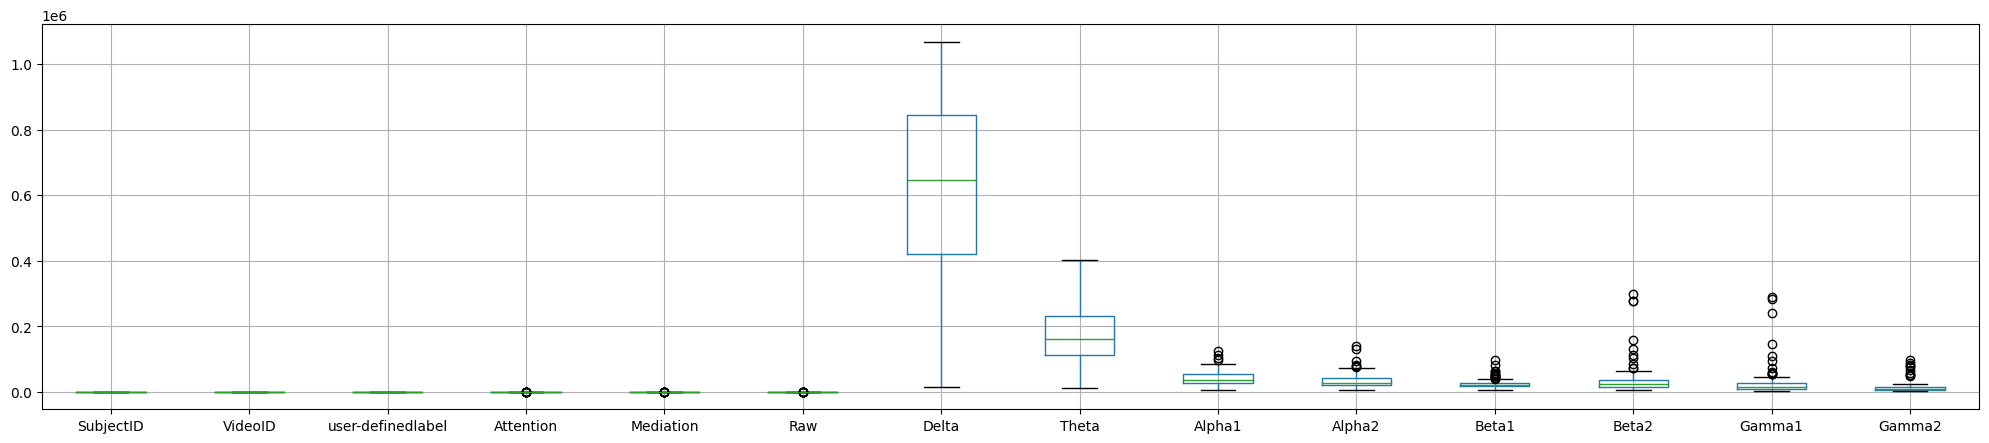

In [6]:
# plot each variables boxplot
eeg.boxplot(figsize=(25, 5))

# Density plots for each feature

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>], dtype=object)

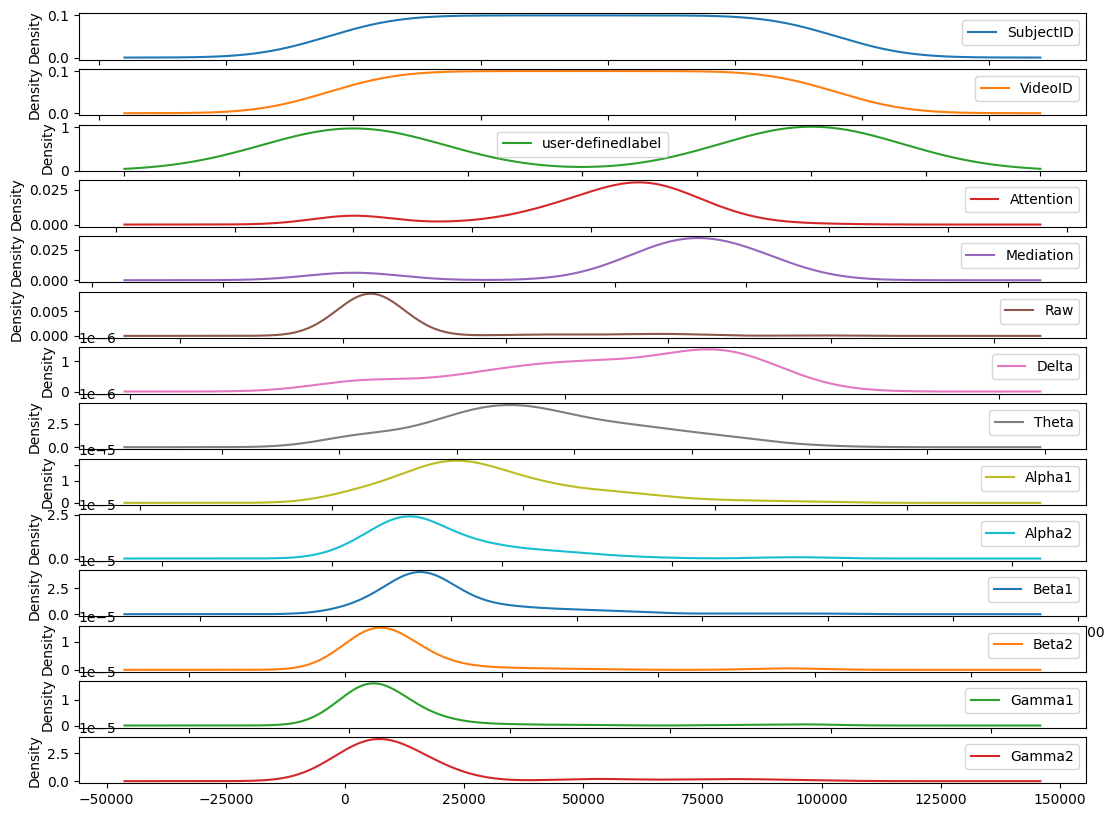

In [7]:
# plot each variables density plot - CLEAN UP Y AXIS
eeg.plot(kind="density", subplots=True, sharex=False, figsize=(13, 10), ylabel=None)

# Correlation Matrix

<Axes: >

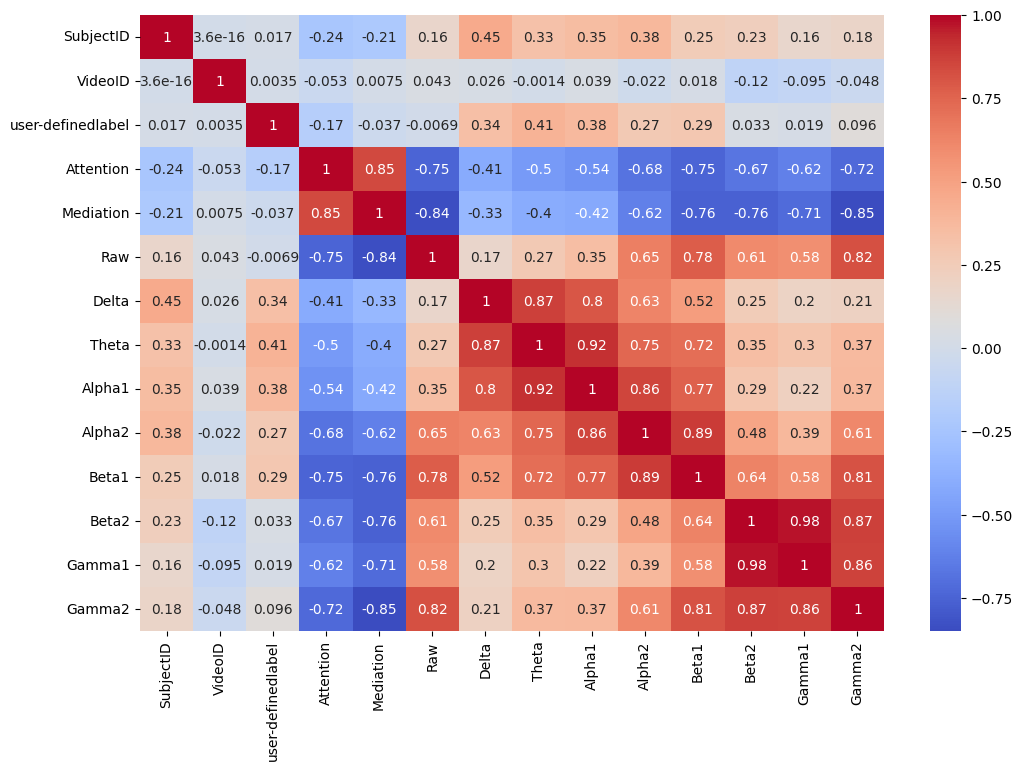

In [8]:
# correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(eeg.corr(), annot=True, cmap="coolwarm")

# Pairplot

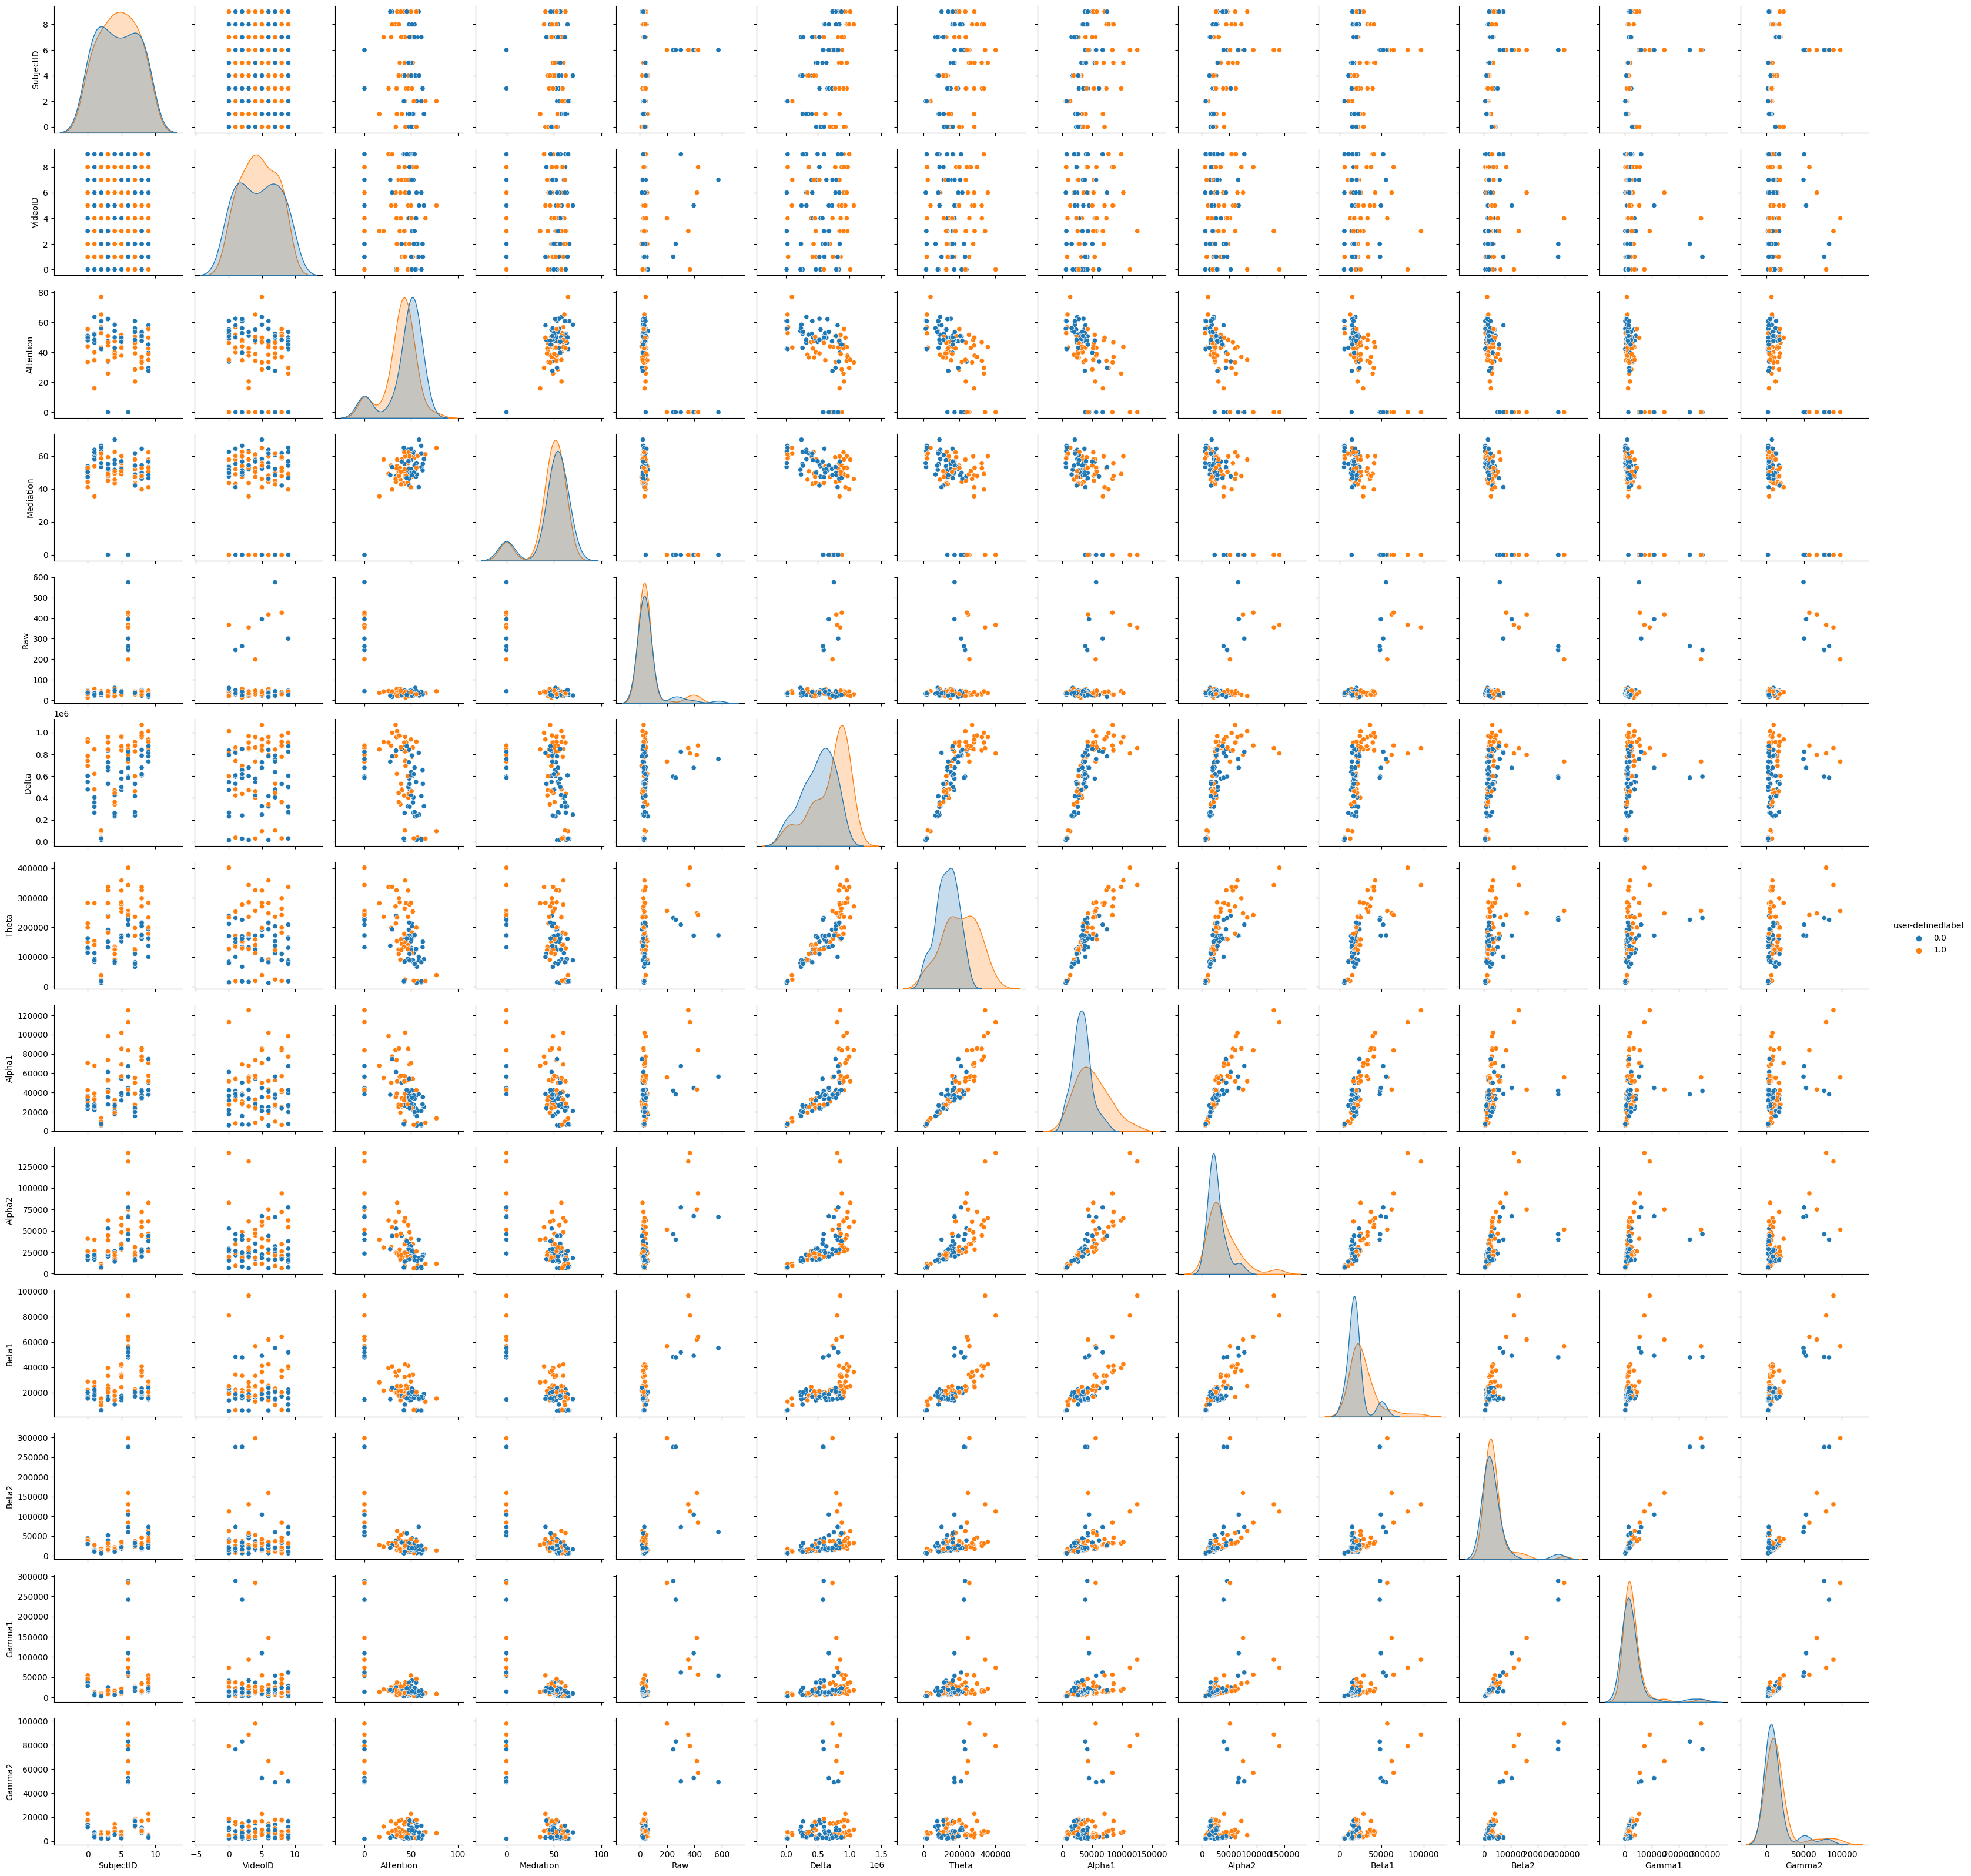

In [10]:
# plot each variables scatter plot with target variable
sns.pairplot(eeg, hue="user-definedlabel")

# Feature Selection

One method of explainable feature selection involves building a basic LASSO model. The L1 regularization term tends to favor the more important features, while changing the weights of others to zero.

Text(0, 0.5, 'Feature')

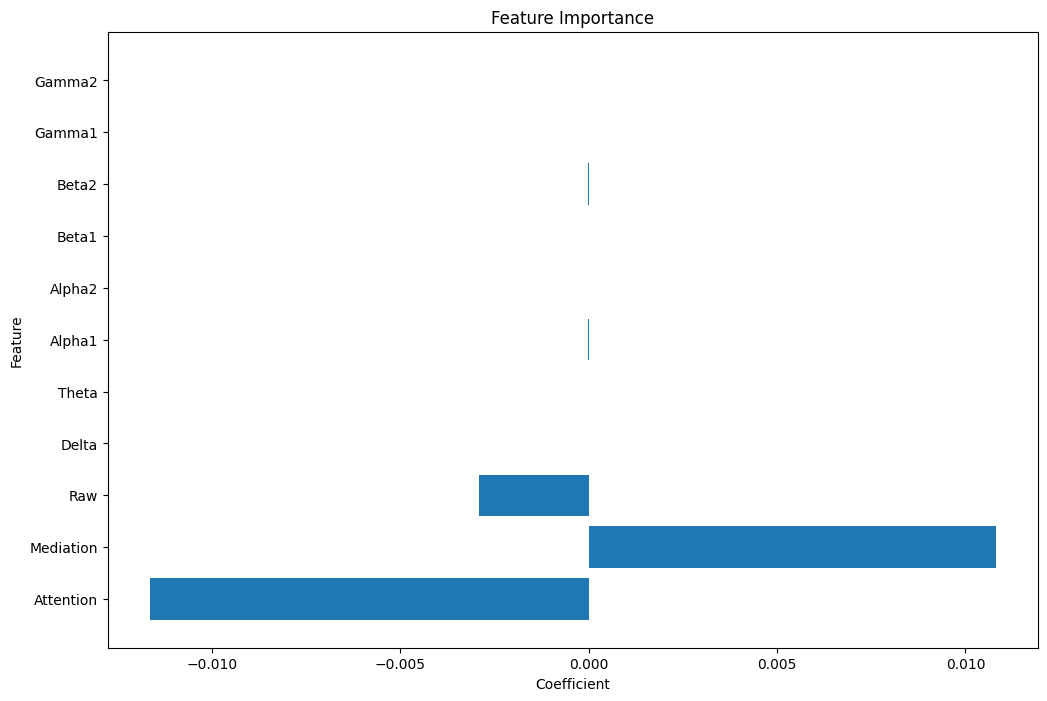

In [18]:
# make a lasso model
from sklearn.linear_model import Lasso

# split data into X and y
X = eeg.drop(["user-definedlabel", "SubjectID", "VideoID"], axis=1)
y = eeg["user-definedlabel"]

# instantiate lasso model
lasso = Lasso(alpha=0.01)

# fit lasso model
lasso.fit(X, y)

# plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(X.columns, lasso.coef_)
plt.title("Feature Importance")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
